In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [41]:
attendance = pd.read_csv('./Data Files/Clean Attendance Payroll and Year.csv')
population = pd.read_csv('./Data Files/2010 CSA Population by Team.csv')

In [47]:
attendance = attendance.groupby('Tm')
attendance = attendance.mean()
attendance = attendance[['Attend/G']]

In [58]:
population.columns = ['Tm','pop']

In [59]:
combined = population.merge(attendance, on = 'Tm')

In [60]:
attendance = []
population = []

attendance.append(combined['Attend/G'])
population.append(combined['pop'])

population = population[0]
attendance = pd.to_numeric(attendance[0])

In [61]:
print(population.head())
print(attendance.head())

correlation = attendance.corr(population)
correlation

0    5584216
1    5119510
2    5480873
3    9686021
4    9686021
Name: pop, dtype: int64
0    29664.181818
1    25986.090909
2    36791.545455
3    37367.454545
4    26351.272727
Name: Attend/G, dtype: float64


0.5406894721651219

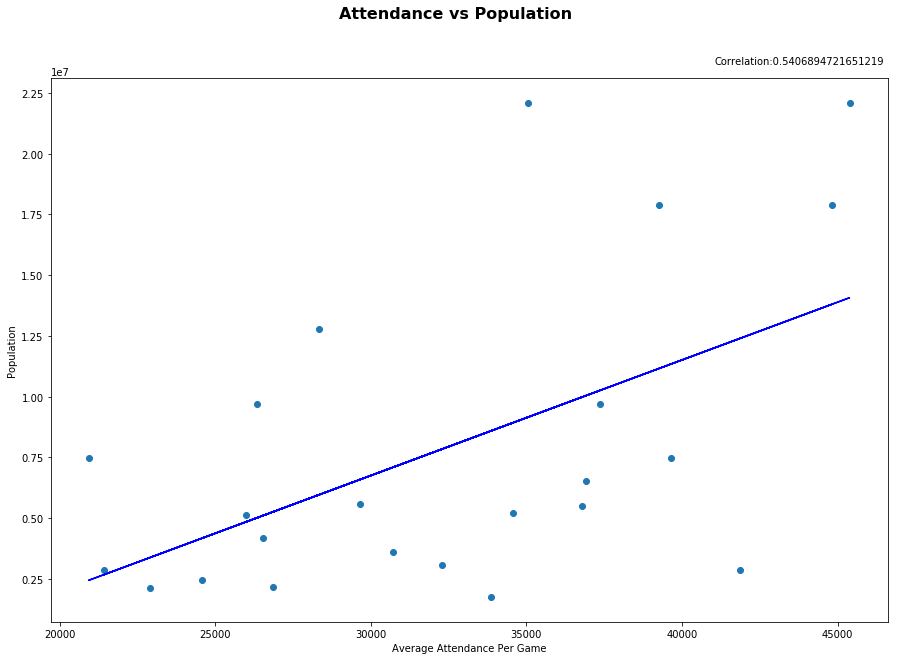

In [74]:
# Plot data

(slope, intercept, _, _, _) = linregress(attendance, population)
fit = slope * attendance + intercept

fig, ax = plt.subplots(figsize=(15,10))

fig.suptitle("Attendance vs Population", fontsize=16, fontweight="bold")

ax.set_xlabel('Average Attendance Per Game')
ax.set_ylabel('Population')

ax.plot(attendance, population, linewidth=0, marker='o')

ax.plot(attendance, fit, 'b')

plt.figtext(.74,.9,(f"Correlation:{correlation}"))
plt.savefig('./Images/Attendance vs Population')